<a href="https://colab.research.google.com/github/kimhyoenwoo/choic_best_place/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#모듈 임포트 
import pandas as pd 
import numpy as np 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
import matplotlib.font_manager as fm

import scipy.stats as stats

#####3
#구글드라이브에 마운트 해야 사용가능 ! 
######


In [ ]:
#아웃 라이어 추출하기 함수 설정 

def  outliers_iqr(data):
  q1, q3 = np.percentile(data,[25,75])
  iqr = q3-q1
  lower_bound = q1-(iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)

  return np.where((data > upper_bound)|(data <lower_bound))

In [ ]:
# 나눔 고딕  다운로드하기 
# 처음 연걸하면 수행해야하는 작업  안하면 나눔고딕 안깔림 

!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
# 체크해보면 폰트 개수가 늘어났다
# 폰트가 제대로 설치됬는지 확인하는 과정 
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
# path = '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

# 우선 fm._rebuild() 를 해주고
fm._rebuild() # 이 과정을 해줘야 제대로 set 이 된다.
plt.rcParams['font.family'] = 'NanumGothic' #plt 폰트 설정해주기 

NanumGothic


In [ ]:
#설치된 폰트리스트 확인하기!
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Serif',
 'STIXSizeOneSym',
 'cmr10',
 'STIXGeneral',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'cmb10',
 'cmtt10',
 'STIXNonUnicode',
 'STIXGeneral',
 'STIXSizeFourSym',
 'STIXSizeFourSym',
 'cmmi10',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'DejaVu Sans Display',
 'STIXSizeTwoSym',
 'DejaVu Sans',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'DejaVu Serif',
 'cmsy10',
 'DejaVu Sans Mono',
 'cmex10',
 'cmss10',
 'STIXSizeFiveSym',
 'STIXSizeTwoSym',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'NanumMyeongjo',
 'NanumSquareRound',
 'NanumMyeongjo Eco',
 'Liberation Sans Narrow',
 'Nanum Brush Script',
 'Liberation Mono',
 'Liberation Serif',
 'NanumMyeongjo Eco',
 'NanumBarunGothic',
 'NanumSquare',
 'NanumMyeongjo',
 'Liberation Serif',
 'Liberation Mono',
 'NanumGothicCoding',
 'NanumGothic Eco',
 'Liberation Sans',
 'NanumGot

In [ ]:
#데이터를 불러오고 데이터 컬럼명을 영어로 바꿔주기 

df = pd.read_csv('/content/drive/MyDrive/공빅데_대전_87조/DATA_완료/법정동_데이터셋.csv')
df.head()

colname = ['dong','code','taxi_on','taxi_off','bus_stop_num','bus_on','bus_off','bus_trans','old_on','old_off']
df.columns = colname
df.head()
# df['old/bus_ratio' ] = df['old_on']/df



,dong,code,taxi_on,taxi_off,bus_stop_num,bus_on,bus_off,bus_trans,old_on,old_off
0,동구 원동,3011010100,10407,8604,7,534244,443947,239119,886,1018
1,동구 인동,3011010200,16079,14672,9,109486,90610,22056,391,102
2,동구 효동,3011010300,6181,6680,7,52783,45757,5595,50,4
3,동구 천동,3011010400,9901,12841,10,39214,32618,1133,28,7
4,동구 가오동,3011010500,32633,35952,25,181248,168749,10920,218,32


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   dong          177 non-null    object
 1   code          177 non-null    int64 
 2   taxi_on       177 non-null    int64 
 3   taxi_off      177 non-null    int64 
 4   bus_stop_num  177 non-null    int64 
 5   bus_on        177 non-null    int64 
 6   bus_off       177 non-null    int64 
 7   bus_trans     177 non-null    int64 
 8   old_on        177 non-null    int64 
 9   old_off       177 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 14.0+ KB


In [ ]:
df.describe()

,code,taxi_on,taxi_off,bus_stop_num,bus_on,bus_off,bus_trans,old_on,old_off
count,1.770000e+02,177.000000,177.000000,177.000000,1.770000e+02,1.770000e+02,177.000000,177.000000,177.000000
mean,3.016826e+09,22704.971751,22704.971751,13.372881,1.427642e+05,1.220956e+05,31426.644068,4729.807910,4712.807910
std,4.304337e+06,43024.083956,41831.561923,10.324119,2.575257e+05,2.238725e+05,76205.050219,16873.834798,17045.828111
min,3.011010e+09,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,3.011014e+09,30.000000,138.000000,6.000000,2.096000e+03,1.715000e+03,28.000000,3.000000,0.000000
50%,3.017012e+09,5664.000000,6680.000000,11.000000,4.448500e+04,4.001100e+04,2994.000000,34.000000,4.000000
75%,3.020014e+09,31091.000000,32646.000000,19.000000,1.962980e+05,1.687490e+05,24631.000000,199.000000,32.000000
max,3.023013e+09,381207.000000,385474.000000,72.000000,2.543725e+06,2.223617e+06,763494.000000,120483.000000,123167.000000


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


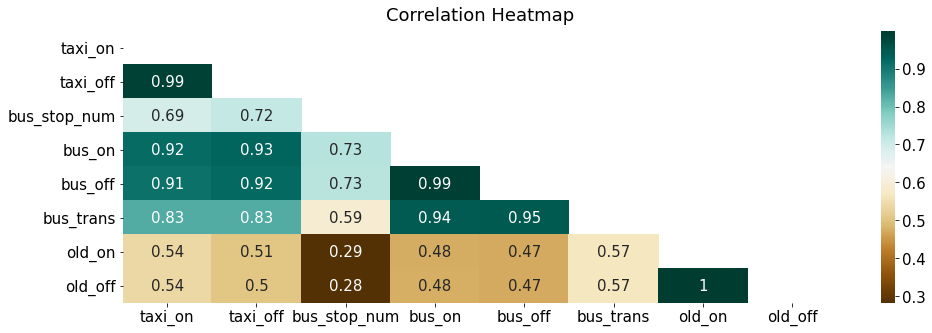

In [ ]:
## 변수간 상관관계 
df_num = df[['taxi_on','taxi_off','bus_stop_num','bus_on','bus_off','bus_trans','old_on','old_off']]
mask = np.triu(np.ones_like(df_num.corr(),dtype=np.bool)) # np.ones_like 를 사용하여 배열의 크기와 동일하며 모든 원소의 값이 1인 배열을 생성 
plt.rcParams['font.size'] =15 # rcParams를 이요하여차트 그림의 기본 설정을 지정 

fig, ax = plt.subplots(figsize = (16,5))
sns.heatmap(df_num.corr(),
            annot=True,
            cmap='BrBG', 
            mask = mask) # maks = 표시하지 않으 부분 지정 
ax.set_title('Correlation Heatmap',pad=10)
plt.show()

In [ ]:
print(df_num.shape)
listed = []
for i in range(0,8):
  for j in range(0,8):
    a= stats.pearsonr(x=df_num.iloc[:,i],y=df_num.iloc[:,j])
    listed.append(a)

pd.DataFrame(listed).to_csv('/content/corr.csv')


(177, 8)


In [ ]:
df_num

,taxi_on,taxi_off,bus_stop_num,bus_on,bus_off,bus_trans,old_on,old_off
0,10407,8604,7,534244,443947,239119,886,1018
1,16079,14672,9,109486,90610,22056,391,102
2,6181,6680,7,52783,45757,5595,50,4
3,9901,12841,10,39214,32618,1133,28,7
4,32633,35952,25,181248,168749,10920,218,32
...,...,...,...,...,...,...,...,...
172,0,0,0,0,0,0,0,0
173,0,0,0,0,0,0,0,0
174,24,138,8,898,612,3,1,0
175,45,225,11,2525,1997,5,1,0


In [ ]:
df_num.iloc[:,1]

0       8604
1      14672
2       6680
3      12841
4      35952
       ...  
172        0
173        0
174      138
175      225
176    23155
Name: taxi_off, Length: 177, dtype: int64

In [ ]:
#상관 계수 유의성 검정 
cor_1 = stats.pearsonr(x=df_num['taxi_on'],y=df_num['taxi_off'])
print('상관계수, 유의확률:\n{0} '.format(cor_1),'\t 택시승차, 택시 하차')
cor_2 = stats.pearsonr(x=df_num['taxi_on'],y=df_num['bus_stop_num'])
print('상관계수, 유의확률:\n{0} '.format(cor_2),'\t 택시승차, 버스 승강장')
cor_3 = stats.pearsonr(x=df_num['taxi_on'],y=df_num['bus_on'])
print('상관계수, 유의확률:\n{0} '.format(cor_3),'\t 택시승차, 버스 승차')
cor_4 = stats.pearsonr(x=df_num['taxi_on'],y=df_num['bus_off'])
print('상관계수, 유의확률:\n{0} '.format(cor_4),'\t 택시승차, 버스 하차')
cor_5 = stats.pearsonr(x=df_num['taxi_on'],y=df_num['bus_trans'])
print('상관계수, 유의확률:\n{0} '.format(cor_5),'\t 택시승차, 버스 환승')
cor_6 = stats.pearsonr(x=df_num['taxi_on'],y=df_num['old_on'])
print('상관계수, 유의확률:\n{0} '.format(cor_6),'\t 택시승차, 고령 하차')
cor_7 = stats.pearsonr(x=df_num['taxi_on'],y=df_num['old_off'])
print('상관계수, 유의확률:\n{0} '.format(cor_7),'\t 택시승차, 고령 하차')
cor_8 = stats.pearsonr(x=df_num['taxi_off'],y=df_num['bus_stop_num'])
print('상관계수, 유의확률:\n{0} '.format(cor_8),'\t 택시하차, 버스 승강장')
cor_9 = stats.pearsonr(x=df_num['taxi_off'],y=df_num['bus_on'])
print('상관계수, 유의확률:\n{0} '.format(cor_9),'\t 택시하차, 버스 승차')
cor_10 = stats.pearsonr(x=df_num['taxi_off'],y=df_num['bus_off'])
print('상관계수, 유의확률:\n{0} '.format(cor_10),'\t 택시하차, 버스 하차')
cor_11 = stats.pearsonr(x=df_num['taxi_off'],y=df_num['bus_trans'])
print('상관계수, 유의확률:\n{0} '.format(cor_11),'\t 택시하차, 버스 환승')
cor_11 = stats.pearsonr(x=df_num['taxi_off'],y=df_num['bus_trans'])
print('상관계수, 유의확률:\n{0} '.format(cor_11),'\t 택시하차, 버스 환승')












상관계수, 유의확률:
(0.9888281945523513, 1.326414780877368e-146)  	 택시승차, 택시 하차
상관계수, 유의확률:
(0.6942267524793385, 8.773332315139325e-27)  	 택시승차, 버스 승강장
상관계수, 유의확률:
(0.920686742320517, 2.0438663041400634e-73)  	 택시승차, 버스 승차
상관계수, 유의확률:
(0.9111697715898622, 2.706793186183438e-69)  	 택시승차, 버스 하차
상관계수, 유의확률:
(0.8275270584576302, 9.70655251339307e-46)  	 택시승차, 버스 환승
상관계수, 유의확률:
(0.5385787252604741, 1.0574396043724496e-14)  	 택시승차, 고령 하차
상관계수, 유의확률:
(0.5382959061175295, 1.0984344850801793e-14)  	 택시승차, 고령 하차
상관계수, 유의확률:
(0.7152245822689337, 4.9556550225372144e-29)  	 택시하차, 버스 승강장
상관계수, 유의확률:
(0.9283889945683327, 3.7751981919550524e-77)  	 택시하차, 버스 승차
상관계수, 유의확률:
(0.9214214401679093, 9.35390740847856e-74)  	 택시하차, 버스 하차
상관계수, 유의확률:
(0.8270737242648405, 1.1957023520042442e-45)  	 택시하차, 버스 환승


In [ ]:
_df_ex = df.iloc[:30,]
df_bus_on = df_ex.groupby(['dong','bus_stop_num'])['bus_on'].mean().reset_index().pivot('bus_stop_num',
                                                                                        'dong','bus_on')
df_bus_on.fillna(0)

dong,동구 가양동,동구 가오동,동구 대동,동구 마산동,동구 비룡동,동구 삼성동,동구 삼정동,동구 성남동,동구 세천동,동구 소제동,동구 신상동,동구 신안동,동구 신하동,동구 신흥동,동구 용계동,동구 용운동,동구 용전동,동구 원동,동구 인동,동구 자양동,동구 정동,동구 주산동,동구 중동,동구 직동,동구 천동,동구 추동,동구 판암동,동구 홍도동,동구 효동,동구 효평동
bus_stop_num,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,826.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,648.0,1532.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520664.0,994.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50446.0,0.0,0.0,0.0,534244.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52783.0,2092.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2381.0,0.0,2096.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,332763.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,421032.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109486.0,258978.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,19854.0,0.0,0.0,69479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39214.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,316589.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,183363.0,0.0,0.0


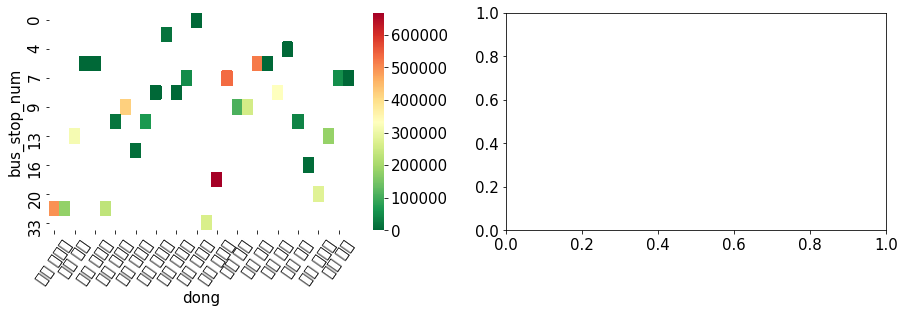

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,4))
sns.heatmap(df_bus_on,cmap='RdYlGn_r',ax=ax[0])
ax[0].tick_params(axis='x', labelrotation=--55) 
plt.show()

# 새 섹션

In [ ]:
# 기존 df에서 비율 파생변수 형성함. 

df_copy = df.copy()

df_copy['ratio_on'] = df_copy['old_on']/df_copy['bus_on'] # 버스 승차인원 대비 노령 승차 인원 비율 
df_copy['ratio_off'] = df_copy['old_off']/df_copy['bus_off'] # 버스 하차인원 대비 노령 하차 인원 비율 

df_copy.fillna(0) # 결측값 0으로 대체하기. 버스 승차인원이 0인경우 필연적으로 노령인구 승차인원은 0이 되기 떄문 

df = df_copy

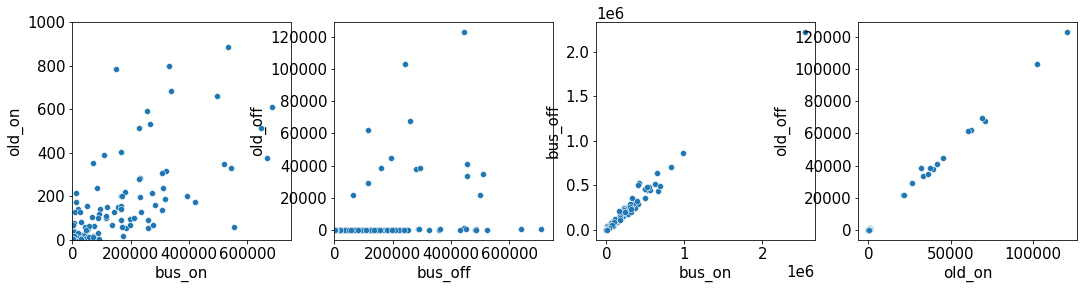

In [ ]:
#EDA 
#버스 승차와 노령인구 버스 승차의 상관관계 
#버스 하차와 노령인구 버스 하차의 상관관계 파악하기

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(18,4))
sns.scatterplot(x="bus_on", y="old_on", data=df,ax=ax[0])
ax[0].set_xlim(0,750000) # 스케일이 너무 커서 스케일 조정 
ax[0].set_ylim(0,1000)
sns.scatterplot(x="bus_off", y="old_off", data=df,ax=ax[1])
ax[1].set_xlim(0,750000) # 스케일이 너무 커서 스케일 조정 
# 버스 승하차의 상관관계 
#노령인구 버스 승하차의 상관관계 
sns.scatterplot(x="bus_on", y="bus_off", data=df,ax=ax[2])
sns.scatterplot(x="old_on", y="old_off", data=df,ax=ax[3])
plt.show()
# plt.plot(df['bus_on'],df['old_on'],'ro')
# plt.xlabel('bus_on')
# plt.ylabel('old_on')
# plt.show()

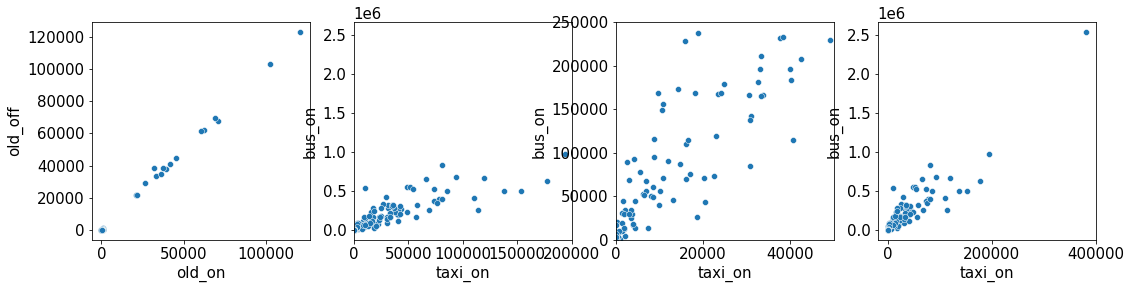

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(18,4))
sns.scatterplot(x="old_on", y="old_off", data=df,ax=ax[0])

sns.scatterplot(x="taxi_on", y="bus_on", data=df,ax=ax[1])
ax[1].set_xlim(0,200000)
sns.scatterplot(x="taxi_on", y="bus_on", data=df,ax=ax[2])
ax[2].set_xlim(0,50000)
ax[2].set_ylim(0,250000)

sns.scatterplot(x="taxi_on", y="bus_on", data=df,ax=ax[3])
# sns.scatterplot(x="taxi_off", y="bus_off", data=df,ax=ax[3])

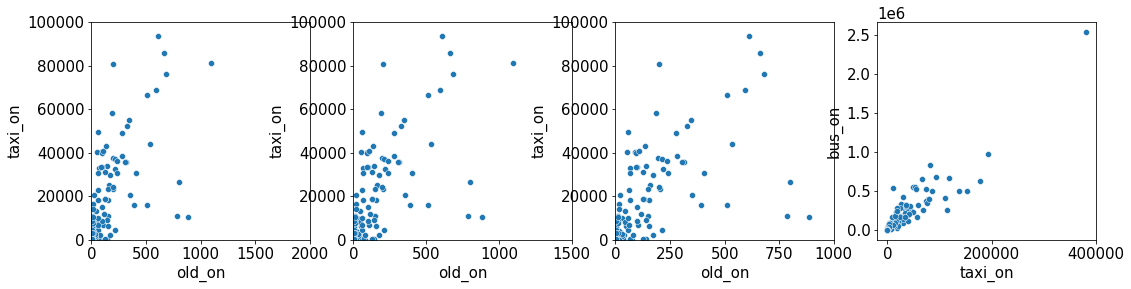

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(18,4))
sns.scatterplot(x="old_on", y="taxi_on", data=df,ax=ax[0])
ax[0].set_xlim(0,2000)
ax[0].set_ylim(0,100000)


sns.scatterplot(x="old_on", y="taxi_on", data=df,ax=ax[1])
ax[1].set_xlim(0,1500)
ax[1].set_ylim(0,100000)

sns.scatterplot(x="old_on", y="taxi_on", data=df,ax=ax[2])
ax[2].set_xlim(0,1000)
ax[2].set_ylim(0,100000)

# sns.scatterplot(x="taxi_on", y="bus_on", data=df,ax=ax[1])
# ax[1].set_xlim(0,200000)
# sns.scatterplot(x="taxi_on", y="bus_on", data=df,ax=ax[2])
# ax[2].set_xlim(0,50000)
# ax[2].set_ylim(0,250000)

sns.scatterplot(x="taxi_on", y="bus_on", data=df,ax=ax[3])
# sns.scatterplot(x="taxi_off", y="bus_off", data=df,ax=ax[3])

(0.0, 20000.0)

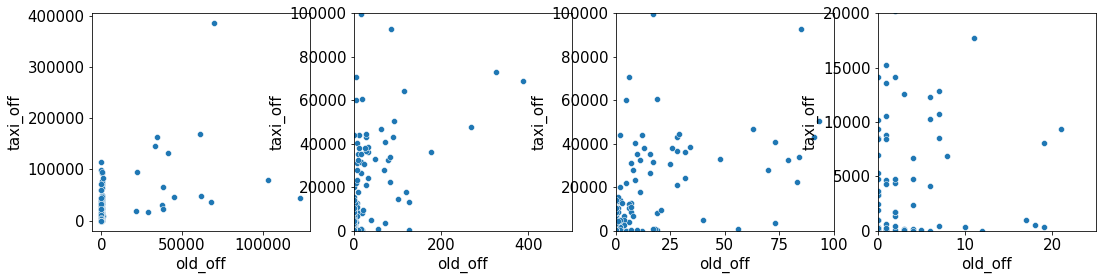

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(18,4))
sns.scatterplot(x="old_off", y="taxi_off", data=df,ax=ax[0])
# ax[0].set_xlim(0,2000)
# ax[0].set_ylim(0,100000)


sns.scatterplot(x="old_off", y="taxi_off", data=df,ax=ax[1])
ax[1].set_xlim(0,500)
ax[1].set_ylim(0,100000)

sns.scatterplot(x="old_off", y="taxi_off", data=df,ax=ax[2])
ax[2].set_xlim(0,100)
ax[2].set_ylim(0,100000)

sns.scatterplot(x="old_off", y="taxi_off", data=df,ax=ax[3])
ax[3].set_xlim(0,25)
ax[3].set_ylim(0,20000)

# sns.scatterplot(x="old_off", y="taxi_off", data=df,ax=ax[1])
# ax[1].set_xlim(0,1500)
# ax[1].set_ylim(0,100000)

# sns.scatterplot(x="old_off", y="taxi_off", data=df,ax=ax[2])
# ax[2].set_xlim(0,1000)
# ax[2].set_ylim(0,100000)



(0.0, 100000.0)

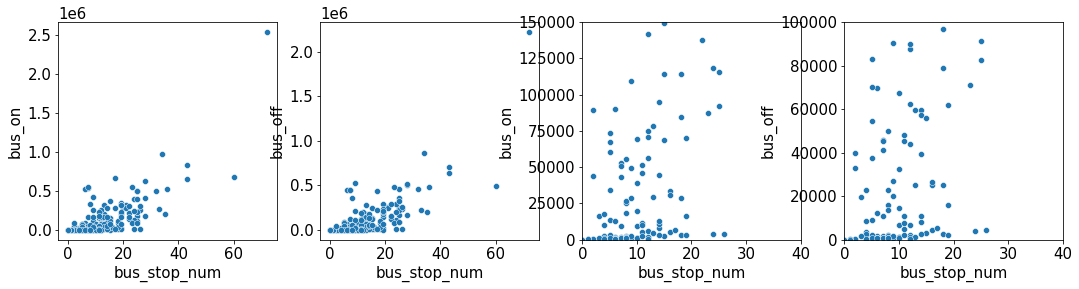

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(18,4))
sns.scatterplot(x="bus_stop_num", y="bus_on", data=df,ax=ax[0]) #상관관계를 가지는 지는 의문 
sns.scatterplot(x="bus_stop_num", y="bus_off", data=df,ax=ax[1]) #상관관계를 가지는 지는 의문


sns.scatterplot(x="bus_stop_num", y="bus_on", data=df,ax=ax[2]) #상관관계를 가지는 지는 의문 
ax[2].set_xlim(0,40) # 스케일이 너무 커서 스케일 조정 
ax[2].set_ylim(0,150000) # 스케일이 너무 커서 스케일 조정 

sns.scatterplot(x="bus_stop_num", y="bus_off", data=df,ax=ax[3]) #상관관계를 가지는 지는 의문
ax[3].set_xlim(0,40) # 스케일이 너무 커서 스케일 조정 
ax[3].set_ylim(0,100000) # 스케일이 너무 커서 스케일 조정  ##### 상관계수 계싼 



# sns.scatterplot(x="bus_stop_num", y="old_on", data=df,ax=ax[2]) #상관관계를 가지는 지는 의문
# # ax[2].set_xlim(0,40) # 스케일이 너무 커서 스케일 조정 
# sns.scatterplot(x="bus_stop_num", y="old_off", data=df,ax=ax[3])#상관관계를 가지는 지는 의문
# # ax[3].set_xlim(0,40) # 스케일이 너무 커서 스케일 조정 


In [ ]:
#택시 승차를 기준으로 내림차순 데이터 셋 형성 
df_order = df.sort_values(by='taxi_on',ascending=False)
df_order_taxioff = df.sort_values(by='taxi_off',ascending=False) # 택시 하차
df_order_bus_stop_num = df.sort_values(by='bus_stop_num',ascending=False) # 승강장 수 
df_order_bus_on = df.sort_values(by='bus_on',ascending=False)# 버스 승차 
df_order_bus_off = df.sort_values(by='bus_off',ascending=False) # 버스 하차 
df_order_bus_trans = df.sort_values(by='bus_trans',ascending=False)# 버스 환승
df_order_old_on = df.sort_values(by='old_on',ascending=False)# 노령 버스 승차 
df_order_old_off = df.sort_values(by='old_off',ascending=False)#노령 버스 하차 
df_order_ratio_on = df.sort_values(by='ratio_off',ascending=False) # 승차 비율 
df_order_ratio_off = df.sort_values(by='ratio_off',ascending=False)# 하차 비율 




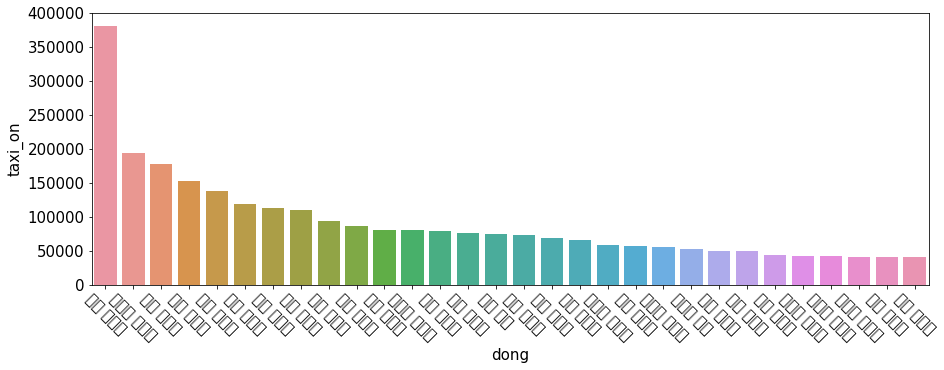

In [ ]:
# 동 대비 택시 승차 수
#높은 갚들부터 30개씩 구간화해 6개의 셋 형성  

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30,50))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
ax.tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 

sns.barplot(data=df_order.iloc[:30,], x='dong', y="taxi_on")


# sns.barplot(data=df_order.iloc[:30,], x='dong', y="taxi_on",ax=ax[0])
# ax[0].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order.iloc[30:60,], x='dong', y="taxi_on",ax=ax[1])
# ax[1].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order.iloc[60:90,], x='dong', y="taxi_on",ax=ax[2])
# ax[2].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order.iloc[90:120,], x='dong', y="taxi_on",ax=ax[3])
# ax[3].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order.iloc[120:150,], x='dong', y="taxi_on",ax=ax[4])
# ax[4].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order.iloc[150:len(df),], x='dong', y="taxi_on",ax=ax[5])
# ax[5].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 

# sns.barplot(data=df.iloc[150:170,], x='code', y="taxi_on",ax=ax[0])

# ax[0].set_xticklabels(code, rotation =-45)

plt.show()


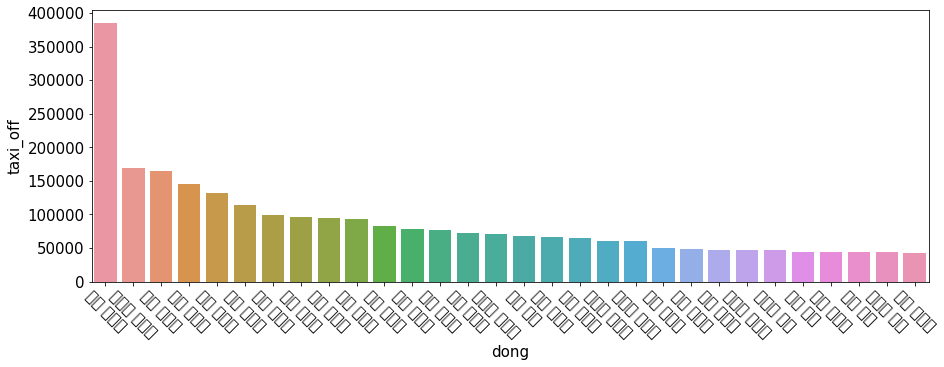

In [ ]:
# 동 대비 택시 하차 수 
# for i in range(0,len(df),30):
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
sns.barplot(data=df_order_taxioff.iloc[:30,], x='dong', y="taxi_off")
ax.tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 

# sns.barplot(data=df_order_taxioff.iloc[:30,], x='dong', y="taxi_off",ax=ax[0])
# ax[0].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_taxioff.iloc[30:60,], x='dong', y="taxi_off",ax=ax[1])
# ax[1].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_taxioff.iloc[60:90,], x='dong', y="taxi_off",ax=ax[2])
# ax[2].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_taxioff.iloc[90:120,], x='dong', y="taxi_off",ax=ax[3])
# ax[3].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_taxioff.iloc[120:150,], x='dong', y="taxi_off",ax=ax[4])
# ax[4].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_taxioff.iloc[150:len(df),], x='dong', y="taxi_off",ax=ax[5])
# ax[5].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 

# sns.barplot(data=df.iloc[150:170,], x='code', y="taxi_on",ax=ax[0])

# ax[0].set_xticklabels(code, rotation =-45)
plt.show()


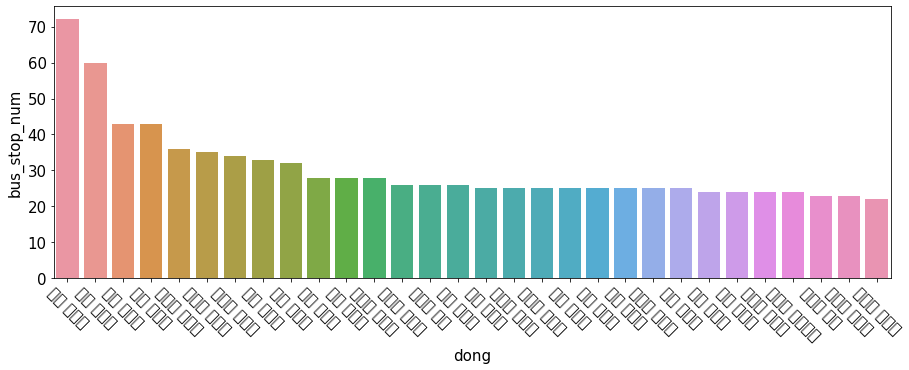

In [ ]:
# df_order_bus_stop_num = df.sort_values(by='bus_stop_num',ascending=False) # 승강장 수 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

sns.barplot(data=df_order_bus_stop_num.iloc[:30,], x='dong', y="bus_stop_num")
ax.tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 


# sns.barplot(data=df_order_bus_stop_num.iloc[:30,], x='dong', y="bus_stop_num",ax=ax[0])
# ax[0].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_bus_stop_num.iloc[30:60,], x='dong', y="bus_stop_num",ax=ax[1])
# ax[1].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_bus_stop_num.iloc[60:90,], x='dong', y="bus_stop_num",ax=ax[2])
# ax[2].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_bus_stop_num.iloc[90:120,], x='dong', y="bus_stop_num",ax=ax[3])
# ax[3].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_bus_stop_num.iloc[120:150,], x='dong', y="bus_stop_num",ax=ax[4])
# ax[4].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_bus_stop_num.iloc[150:len(df),], x='dong', y="bus_stop_num",ax=ax[5])
# ax[5].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 

# sns.barplot(data=df.iloc[150:170,], x='code', y="taxi_on",ax=ax[0])

# ax[0].set_xticklabels(code, rotation =-45)
plt.show()



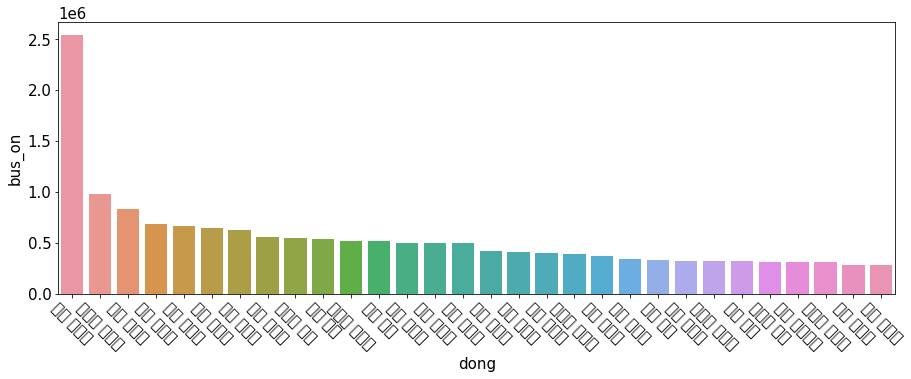

In [ ]:
# df_order_bus_on = df.sort_values(by='bus_on',ascending=False)# 버스 승차 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

sns.barplot(data=df_order_bus_on.iloc[:30,], x='dong', y="bus_on")
ax.tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 


# sns.barplot(data=df_order_bus_on.iloc[:30,], x='dong', y="bus_on",ax=ax[0])
# ax[0].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_bus_on.iloc[30:60,], x='dong', y="bus_on",ax=ax[1])
# ax[1].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_bus_on.iloc[60:90,], x='dong', y="bus_on",ax=ax[2])
# ax[2].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_bus_on.iloc[90:120,], x='dong', y="bus_on",ax=ax[3])
# ax[3].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_bus_on.iloc[120:150,], x='dong', y="bus_on",ax=ax[4])
# ax[4].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_bus_on.iloc[150:len(df),], x='dong', y="bus_on",ax=ax[5])
# ax[5].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 

# sns.barplot(data=df.iloc[150:170,], x='code', y="taxi_on",ax=ax[0])

# ax[0].set_xticklabels(code, rotation =-45)
plt.show()

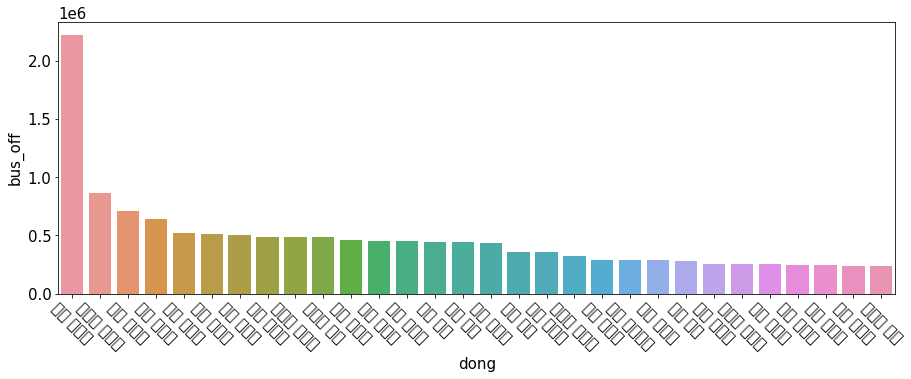

In [ ]:
# df_order_bus_off = df.sort_values(by='bus_off',ascending=False) # 버스 하차 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

sns.barplot(data=df_order_bus_off.iloc[:30,], x='dong', y="bus_off")
ax.tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 


# sns.barplot(data=df_order_bus_off.iloc[:30,], x='dong', y="bus_off",ax=ax[0])
# ax[0].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_bus_off.iloc[30:60,], x='dong', y="bus_off",ax=ax[1])
# ax[1].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_bus_off.iloc[60:90,], x='dong', y="bus_off",ax=ax[2])
# ax[2].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_bus_off.iloc[90:120,], x='dong', y="bus_off",ax=ax[3])
# ax[3].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_bus_off.iloc[120:150,], x='dong', y="bus_off",ax=ax[4])
# ax[4].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_bus_off.iloc[150:len(df),], x='dong', y="bus_off",ax=ax[5])
# ax[5].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 

# sns.barplot(data=df.iloc[150:170,], x='code', y="taxi_on",ax=ax[0])

# ax[0].set_xticklabels(code, rotation =-45)
plt.show()

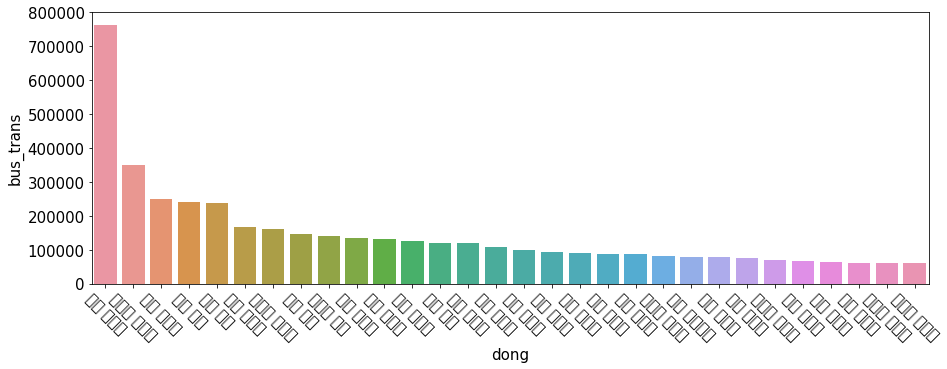

In [ ]:
# df_order_bus_trans = df.sort_values(by='bus_trans',ascending=False)# 버스 환승
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

sns.barplot(data=df_order_bus_trans.iloc[:30,], x='dong', y="bus_trans")
ax.tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 


# fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(30,50))

# sns.barplot(data=df_order_bus_trans.iloc[:30,], x='dong', y="bus_trans",ax=ax[0])
# ax[0].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_bus_trans.iloc[30:60,], x='dong', y="bus_trans",ax=ax[1])
# ax[1].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_bus_trans.iloc[60:90,], x='dong', y="bus_trans",ax=ax[2])
# ax[2].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_bus_trans.iloc[90:120,], x='dong', y="bus_trans",ax=ax[3])
# ax[3].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_bus_trans.iloc[120:150,], x='dong', y="bus_trans",ax=ax[4])
# ax[4].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_bus_trans.iloc[150:len(df),], x='dong', y="bus_trans",ax=ax[5])
# ax[5].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 

# sns.barplot(data=df.iloc[150:170,], x='code', y="taxi_on",ax=ax[0])

# ax[0].set_xticklabels(code, rotation =-45)
plt.show()

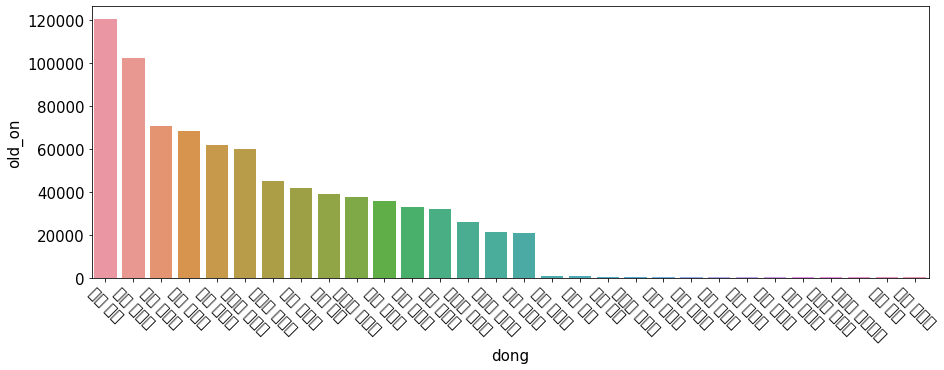

In [ ]:
# df_order_old_on = df.sort_values(by='old_on',ascending=False)# 노령 버스 승차 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

sns.barplot(data=df_order_old_on.iloc[:30,], x='dong', y="old_on")
ax.tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(30,50))

# sns.barplot(data=df_order_old_on.iloc[:30,], x='dong', y="old_on",ax=ax[0])
# ax[0].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_old_on.iloc[30:60,], x='dong', y="old_on",ax=ax[1])
# ax[1].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_old_on.iloc[60:90,], x='dong', y="old_on",ax=ax[2])
# ax[2].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_old_on.iloc[90:120,], x='dong', y="old_on",ax=ax[3])
# ax[3].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_old_on.iloc[120:150,], x='dong', y="old_on",ax=ax[4])
# ax[4].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_old_on.iloc[150:len(df),], x='dong', y="old_on",ax=ax[5])
# ax[5].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 

# sns.barplot(data=df.iloc[150:170,], x='code', y="taxi_on",ax=ax[0])

# ax[0].set_xticklabels(code, rotation =-45)
plt.show()


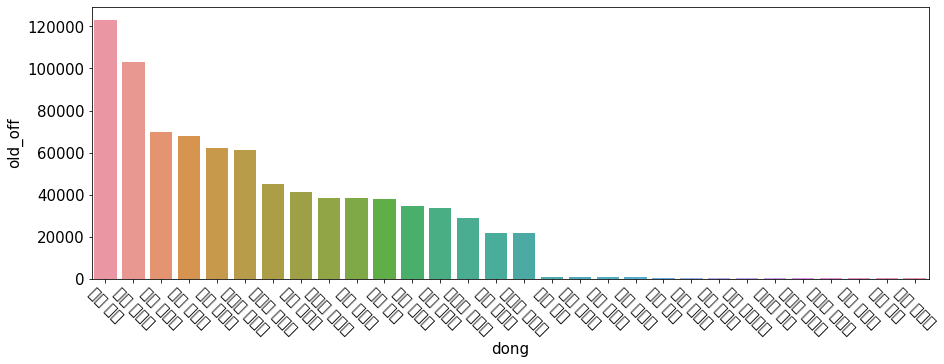

In [ ]:

# df_order_old_off = df.sort_values(by='old_off',ascending=False)#노령 버스 하차 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

sns.barplot(data=df_order_old_off.iloc[:30,], x='dong', y="old_off")
ax.tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(30,50))

# sns.barplot(data=df_order_old_off.iloc[:30,], x='dong', y="old_off",ax=ax[0])
# ax[0].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_old_off.iloc[30:60,], x='dong', y="old_off",ax=ax[1])
# ax[1].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_old_off.iloc[60:90,], x='dong', y="old_off",ax=ax[2])
# ax[2].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_old_off.iloc[90:120,], x='dong', y="old_off",ax=ax[3])
# ax[3].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_old_off.iloc[120:150,], x='dong', y="old_off",ax=ax[4])
# ax[4].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 
# sns.barplot(data=df_order_old_off.iloc[150:len(df),], x='dong', y="old_off",ax=ax[5])
# ax[5].tick_params(axis='x', labelrotation=-45) # 개별 결과값에 각도 설정 

# sns.barplot(data=df.iloc[150:170,], x='code', y="taxi_on",ax=ax[0])

# ax[0].set_xticklabels(code, rotation =-45)
plt.show()

In [ ]:
# 각 상위 30개 데이터들을 하나의 데이터 셋으로 합치기 

taxi_on = pd.Series(df_order.iloc[:30]['dong'])
bus_off=pd.Series(df_order_bus_off[:30]['dong'])
bus_on=pd.Series(df_order_bus_on[:30]['dong'])
bus_stop_num = pd.Series(df_order_bus_stop_num[:30]['dong'])#bus_stop 많은 순 
bus_trans =pd.Series(df_order_bus_trans[:30]['dong'])
old_off=pd.Series(df_order_old_off[:30]['dong'])
old_on=pd.Series(df_order_old_on[:30]['dong'])
taxi_off=pd.Series(df_order_taxioff[:30]['dong'])
ratio_on=pd.Series(df_order_ratio_on[:30]['dong'])
ratio_off=pd.Series(df_order_ratio_off[:30]['dong'])


bus_stop_num_low = pd.Series(df_order_bus_stop_num[len(df)-30:len(df)]['dong'])#bus_stop 적은순 



In [ ]:
#법정동별 버스 승강장 수가 많은 30개 지역과 함께 데이터 셋 형성 
top_30  =pd.concat([taxi_on,taxi_off,bus_off,bus_on,bus_stop_num,bus_trans,old_off,old_on,ratio_on,ratio_off],axis=1)
#법정동별 버스 승강장 수가 적은 30개 지역과 함께 데이터 셋 형성 
top_30_low = pd.concat([taxi_on,taxi_off,bus_off,bus_on,bus_stop_num_low,bus_trans,old_off,old_on,ratio_on,ratio_off],axis=1)



In [ ]:
# 보기 쉽게 컬럼 형성 
top_30.columns =['taxi_on','taxi_off','bus_off','bus_on','bus_stop_num','bus_trans','old_off','old_on','ratio_on','ratio_off']  #버스 정류장 많은 순 
#데이터 프레임 화 
df_top_30 = pd.DataFrame(top_30)

#상위에 랭크된 개별 법정동 횟수 계산하는 for문 
top_list =[]
for i in range(0,len(df_top_30)):
  a= df_top_30.iloc[i,:].value_counts()[0]
  top_list.append(a)

df_top_30=df_top_30.reset_index() 
df_top_30['count'] = pd.Series(top_list)
df_top_30.sort_values(by='count',ascending=False).head(20)

# print(len(top_list))
# print(len(df_top_30))
# print(top_list)
# print(len(top_list))
# print(len(df_top_30))


#모든 수치(30등이네)가 높게 나타는 지역
#서구 도마동은 대중교통 사용량 택시 사용량 등이 맣다 그에 따라서 버스 승차장 수도 많다. 모든 지표에서 높은 랭크 

,index,taxi_on,taxi_off,bus_off,bus_on,bus_stop_num,bus_trans,old_off,old_on,ratio_on,ratio_off,count
35,76,서구 탄방동,서구 탄방동,서구 탄방동,서구 탄방동,서구 탄방동,서구 탄방동,서구 탄방동,서구 탄방동,서구 탄방동,서구 탄방동,10
47,108,유성구 봉명동,유성구 봉명동,유성구 봉명동,유성구 봉명동,유성구 봉명동,유성구 봉명동,유성구 봉명동,유성구 봉명동,유성구 봉명동,유성구 봉명동,10
40,82,서구 월평동,서구 월평동,서구 월평동,서구 월평동,서구 월평동,서구 월평동,서구 월평동,서구 월평동,서구 월평동,서구 월평동,10
39,81,서구 둔산동,서구 둔산동,서구 둔산동,서구 둔산동,서구 둔산동,서구 둔산동,서구 둔산동,서구 둔산동,서구 둔산동,서구 둔산동,10
38,80,서구 갈마동,서구 갈마동,서구 갈마동,서구 갈마동,서구 갈마동,서구 갈마동,서구 갈마동,서구 갈마동,서구 갈마동,서구 갈마동,10
22,49,중구 대흥동,중구 대흥동,중구 대흥동,중구 대흥동,중구 대흥동,중구 대흥동,중구 대흥동,중구 대흥동,중구 대흥동,중구 대흥동,10
20,46,중구 선화동,중구 선화동,중구 선화동,중구 선화동,중구 선화동,중구 선화동,중구 선화동,중구 선화동,중구 선화동,중구 선화동,10
13,18,동구 정동,동구 정동,동구 정동,동구 정동,NaN,동구 정동,동구 정동,동구 정동,동구 정동,동구 정동,9
23,57,중구 오류동,중구 오류동,중구 오류동,중구 오류동,NaN,중구 오류동,중구 오류동,중구 오류동,중구 오류동,중구 오류동,9
42,85,서구 관저동,서구 관저동,서구 관저동,서구 관저동,서구 관저동,서구 관저동,서구 관저동,서구 관저동,NaN,NaN,8


In [ ]:
top_30_low.columns =['taxi_on','taxi_off','bus_off','bus_on','bus_stop_num_low','bus_trans','old_off','old_on','ratio_on','ratio_off']  #버스 정류장 많은 순 

df_top_30_low= pd.DataFrame(top_30_low)

top_list_low=[]
for i in range(0,len(df_top_30_low)):
  a= df_top_30_low.iloc[i,:].value_counts()[0]
  top_list_low.append(a)

df_top_30_low=df_top_30_low.reset_index() # 이거 먼저 수행하면 value_counts가 잘 안됨 
df_top_30_low['count'] = pd.Series(top_list_low)
df_top_30_low.sort_values(by='count',ascending=False) .head(30)
# print(top_list_low)

# top_list_low.iloc[i,:].value_counts()

#df_top_30_low의 경우 버스 승차장 수가 적은 데이터와 교통량이 많은 상위 데이터들의 합 
#서구 갈마동의 경우 택시 승하차, 버스 승하차 등의 데이터가 높게 유지되지만 버스 승차자의 갯수가 하위 30개내에 포함되지 않아 null값을 
#형성하고 있다. 따라서 서구 갈마동의 경우 목표로하는 우선입지 대상으로 선정할 수 없다 .
# 버스 정류장이 적은 곳은 교통량이 상위에 랭크되지 않는다.    
# 즉 탑 티어를 노리는게 아니라 중간 클래스를 노려야 한다. 생성한 데이터 셋에서 count가 높으며 bus_stop_num_low가 해당되는 지역 






,index,taxi_on,taxi_off,bus_off,bus_on,bus_stop_num_low,bus_trans,old_off,old_on,ratio_on,ratio_off,count
43,76,서구 탄방동,서구 탄방동,서구 탄방동,서구 탄방동,NaN,서구 탄방동,서구 탄방동,서구 탄방동,서구 탄방동,서구 탄방동,9
13,18,동구 정동,동구 정동,동구 정동,동구 정동,NaN,동구 정동,동구 정동,동구 정동,동구 정동,동구 정동,9
56,108,유성구 봉명동,유성구 봉명동,유성구 봉명동,유성구 봉명동,NaN,유성구 봉명동,유성구 봉명동,유성구 봉명동,유성구 봉명동,유성구 봉명동,9
48,82,서구 월평동,서구 월평동,서구 월평동,서구 월평동,NaN,서구 월평동,서구 월평동,서구 월평동,서구 월평동,서구 월평동,9
47,81,서구 둔산동,서구 둔산동,서구 둔산동,서구 둔산동,NaN,서구 둔산동,서구 둔산동,서구 둔산동,서구 둔산동,서구 둔산동,9
46,80,서구 갈마동,서구 갈마동,서구 갈마동,서구 갈마동,NaN,서구 갈마동,서구 갈마동,서구 갈마동,서구 갈마동,서구 갈마동,9
31,57,중구 오류동,중구 오류동,중구 오류동,중구 오류동,NaN,중구 오류동,중구 오류동,중구 오류동,중구 오류동,중구 오류동,9
28,49,중구 대흥동,중구 대흥동,중구 대흥동,중구 대흥동,NaN,중구 대흥동,중구 대흥동,중구 대흥동,중구 대흥동,중구 대흥동,9
26,46,중구 선화동,중구 선화동,중구 선화동,중구 선화동,NaN,중구 선화동,중구 선화동,중구 선화동,중구 선화동,중구 선화동,9
50,85,서구 관저동,서구 관저동,서구 관저동,서구 관저동,NaN,서구 관저동,서구 관저동,서구 관저동,NaN,NaN,7


In [ ]:
df_top_30.sort_values(by='count',ascending=False) .head(20)



,index,taxi_on,taxi_off,bus_off,bus_on,bus_stop_num,bus_trans,old_off,old_on,ratio_on,ratio_off,count
35,76,서구 탄방동,서구 탄방동,서구 탄방동,서구 탄방동,서구 탄방동,서구 탄방동,서구 탄방동,서구 탄방동,서구 탄방동,서구 탄방동,10
47,108,유성구 봉명동,유성구 봉명동,유성구 봉명동,유성구 봉명동,유성구 봉명동,유성구 봉명동,유성구 봉명동,유성구 봉명동,유성구 봉명동,유성구 봉명동,10
40,82,서구 월평동,서구 월평동,서구 월평동,서구 월평동,서구 월평동,서구 월평동,서구 월평동,서구 월평동,서구 월평동,서구 월평동,10
39,81,서구 둔산동,서구 둔산동,서구 둔산동,서구 둔산동,서구 둔산동,서구 둔산동,서구 둔산동,서구 둔산동,서구 둔산동,서구 둔산동,10
38,80,서구 갈마동,서구 갈마동,서구 갈마동,서구 갈마동,서구 갈마동,서구 갈마동,서구 갈마동,서구 갈마동,서구 갈마동,서구 갈마동,10
22,49,중구 대흥동,중구 대흥동,중구 대흥동,중구 대흥동,중구 대흥동,중구 대흥동,중구 대흥동,중구 대흥동,중구 대흥동,중구 대흥동,10
20,46,중구 선화동,중구 선화동,중구 선화동,중구 선화동,중구 선화동,중구 선화동,중구 선화동,중구 선화동,중구 선화동,중구 선화동,10
13,18,동구 정동,동구 정동,동구 정동,동구 정동,NaN,동구 정동,동구 정동,동구 정동,동구 정동,동구 정동,9
23,57,중구 오류동,중구 오류동,중구 오류동,중구 오류동,NaN,중구 오류동,중구 오류동,중구 오류동,중구 오류동,중구 오류동,9
42,85,서구 관저동,서구 관저동,서구 관저동,서구 관저동,서구 관저동,서구 관저동,서구 관저동,서구 관저동,NaN,NaN,8


In [ ]:
df_order_bus_stop_num.describe()

,code,taxi_on,taxi_off,bus_stop_num,bus_on,bus_off,bus_trans,old_on,old_off,ratio_on,ratio_off
count,1.770000e+02,177.000000,177.000000,177.000000,1.770000e+02,1.770000e+02,177.000000,177.000000,177.000000,171.000000,170.000000
mean,3.016826e+09,22704.971751,22704.971751,13.372881,1.427642e+05,1.220956e+05,31426.644068,4729.807910,4712.807910,inf,0.019658
std,4.304337e+06,43024.083956,41831.561923,10.324119,2.575257e+05,2.238725e+05,76205.050219,16873.834798,17045.828111,NaN,0.073236
min,3.011010e+09,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.011014e+09,30.000000,138.000000,6.000000,2.096000e+03,1.715000e+03,28.000000,3.000000,0.000000,0.000425,0.000000
50%,3.017012e+09,5664.000000,6680.000000,11.000000,4.448500e+04,4.001100e+04,2994.000000,34.000000,4.000000,0.000959,0.000101
75%,3.020014e+09,31091.000000,32646.000000,19.000000,1.962980e+05,1.687490e+05,24631.000000,199.000000,32.000000,0.003335,0.000888
max,3.023013e+09,381207.000000,385474.000000,72.000000,2.543725e+06,2.223617e+06,763494.000000,120483.000000,123167.000000,inf,0.541353


In [ ]:
bus_off_index = outliers_iqr(df['bus_off'])[0]# bus off의 아웃라이어 인덱스 구하기  
df.loc[bus_off_index,'bus_off'] # 해당하는 값들 추출 

taxi_off_index = outliers_iqr(df['taxi_off'])[0]# taxi off의 아웃라이어 인덱스 구하기  
df.loc[taxi_off_index,'taxi_off'] # 해당하는 값들 추출 

bus_on_index = outliers_iqr(df['bus_on'])[0]# bus off의 아웃라이어 인덱스 구하기  
df.loc[bus_on_index,'bus_on'] # 해당하는 값들 추출 



# df.loc[pd.Series(bus_off_index),pd.Series(df['bus_off'])]

# pd.Series(bus_off_index)
# pd.Series(df['bus_off'])


0       534244
13      495948
14      666722
18      520664
45      555205
60      646187
73      834394
76      497290
80      621208
81     2543725
82      500545
85      684112
108     977381
119     545506
151     521026
Name: bus_on, dtype: int64

In [ ]:
#bus off 이상치 처리 

not_outlier_index=[]

# print(len(df))
list_new = list(range(0,len(df)))

for i in list_new:
  if i not in bus_off_index:
    not_outlier_index.append(i)
# 이상치가 아닌 값들 
df.loc[not_outlier_index].reset_index()

,index,dong,code,taxi_on,taxi_off,bus_stop_num,bus_on,bus_off,bus_trans,old_on,old_off,ratio_on,ratio_off
0,1,동구 인동,3011010200,16079,14672,9,109486,90610,22056,391,102,0.003571,0.001126
1,2,동구 효동,3011010300,6181,6680,7,52783,45757,5595,50,4,0.000947,0.000087
2,3,동구 천동,3011010400,9901,12841,10,39214,32618,1133,28,7,0.000714,0.000215
3,4,동구 가오동,3011010500,32633,35952,25,181248,168749,10920,218,32,0.001203,0.000190
4,5,동구 신흥동,3011010600,8033,8078,7,50446,41186,7010,43,19,0.000852,0.000461
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,172,대덕구 부수동,3023012200,0,0,0,0,0,0,0,0,NaN,NaN
157,173,대덕구 황호동,3023012300,0,0,0,0,0,0,0,0,NaN,NaN
158,174,대덕구 삼정동,3023012400,24,138,8,898,612,3,1,0,0.001114,0.000000
159,175,대덕구 미호동,3023012500,45,225,11,2525,1997,5,1,0,0.000396,0.000000


In [ ]:
# taxi off 이상치 처리 

not_outlier_index_taxi_off = []
# print(len(df))
list_new = list(range(0,len(df)))

for i in list_new:
  if i not in taxi_off_index:
    not_outlier_index_taxi_off.append(i)
# 이상치가 아닌 값들 
df.loc[not_outlier_index_taxi_off].reset_index()

,index,dong,code,taxi_on,taxi_off,bus_stop_num,bus_on,bus_off,bus_trans,old_on,old_off,ratio_on,ratio_off
0,0,동구 원동,3011010100,10407,8604,7,534244,443947,239119,886,1018,0.001658,0.002293
1,1,동구 인동,3011010200,16079,14672,9,109486,90610,22056,391,102,0.003571,0.001126
2,2,동구 효동,3011010300,6181,6680,7,52783,45757,5595,50,4,0.000947,0.000087
3,3,동구 천동,3011010400,9901,12841,10,39214,32618,1133,28,7,0.000714,0.000215
4,4,동구 가오동,3011010500,32633,35952,25,181248,168749,10920,218,32,0.001203,0.000190
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,172,대덕구 부수동,3023012200,0,0,0,0,0,0,0,0,NaN,NaN
162,173,대덕구 황호동,3023012300,0,0,0,0,0,0,0,0,NaN,NaN
163,174,대덕구 삼정동,3023012400,24,138,8,898,612,3,1,0,0.001114,0.000000
164,175,대덕구 미호동,3023012500,45,225,11,2525,1997,5,1,0,0.000396,0.000000


In [ ]:
# bus_on 이상치 처리 

not_outlier_index_bus_on = []
# print(len(df))
list_new = list(range(0,len(df)))

for i in list_new:
  if i not in bus_on_index:
    not_outlier_index_bus_on.append(i)
# 이상치가 아닌 값들 
df.loc[not_outlier_index_bus_on].reset_index()

,index,dong,code,taxi_on,taxi_off,bus_stop_num,bus_on,bus_off,bus_trans,old_on,old_off,ratio_on,ratio_off
0,1,동구 인동,3011010200,16079,14672,9,109486,90610,22056,391,102,0.003571,0.001126
1,2,동구 효동,3011010300,6181,6680,7,52783,45757,5595,50,4,0.000947,0.000087
2,3,동구 천동,3011010400,9901,12841,10,39214,32618,1133,28,7,0.000714,0.000215
3,4,동구 가오동,3011010500,32633,35952,25,181248,168749,10920,218,32,0.001203,0.000190
4,5,동구 신흥동,3011010600,8033,8078,7,50446,41186,7010,43,19,0.000852,0.000461
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,172,대덕구 부수동,3023012200,0,0,0,0,0,0,0,0,NaN,NaN
158,173,대덕구 황호동,3023012300,0,0,0,0,0,0,0,0,NaN,NaN
159,174,대덕구 삼정동,3023012400,24,138,8,898,612,3,1,0,0.001114,0.000000
160,175,대덕구 미호동,3023012500,45,225,11,2525,1997,5,1,0,0.000396,0.000000


In [ ]:
print(np.std(df['bus_on']))
print(np.std(df['bus_stop_num']))
print(np.std(df['bus_off']))



256797.23929176634
10.294913952030337
223239.24208007526


In [ ]:
# df_new = df[['dong','taxi_on','taxi_off','bus_stop_num','bus_on','bus_off','old_on','old_off'] # 버스 트랜스 제거 
# df_new
# # df_new['bus_all'] = df['bus_on'] +df['bus_off'] # 버스 승하차 데이터로 합치기 
# df_new.drop('bus_on',inplace=True,axis=1) # on 제거 
# df_new.drop('bus_off',inplace=True,axis=1)# off 제거 
# df_new['old_all'] = df_new['old_on']+df_new['old_off']
# df_new.drop('old_on',inplace=True,axis=1)
# df_new.drop('old_off',inplace=True,axis=1)
# df_new['taxi_all'] = df_new['taxi_on']+df_new['taxi_off']
# df_new.drop('taxi_on',inplace=True,axis=1)
# df_new.drop('taxi_off',inplace=True,axis=1)
# df_new['ratio'] = df_new['old_all'] / df_new['bus_stop_num']
# df_new[df_new['bus_stop_num']==0] # 이 지역 보면 bus_stop_num 0인경우 7개
# # 0인경우 6개 1인경우 1개 결측치 그냥 0으로 처리 
# df_new = df_new.fillna(0)



In [ ]:
# df_new.to_csv('/content/sample_data/new_data.csv')

In [ ]:
# df_new

고령자 승하차 데이터가 중요하다. 

버스 승하차 (버스승차 하차) 


노령인구 버스 이용량 /버스 승차장 수 ()    값이 커지면 필요성 이 높아지는곳 



고령인구를 반여하는 수치 

고령자 승하차 /전체 버스 이용량  ->  